OUTLIER DETECTION AND CLEANING - MEMORY NETWORK LOSS ANALYSIS (ISOLATION FOREST)

📊 Processing Memory Utilization with Isolation Forest:
  🔍 NETLOSS:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)
  🔍 BASELINE:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)

📊 Processing Memory Cache with Isolation Forest:
  🔍 NETLOSS:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)
  🔍 BASELINE:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)

📊 Processing Memory Available with Isolation Forest:
  🔍 NETLOSS:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)
  🔍 BASELINE:
    ✅ Cleaned 10 outliers using 8 features (2% contamination)

COMPREHENSIVE MEMORY NETWORK LOSS ANALYSIS - ISOLATION FOREST

🔄 Analyzing Memory Utilization...


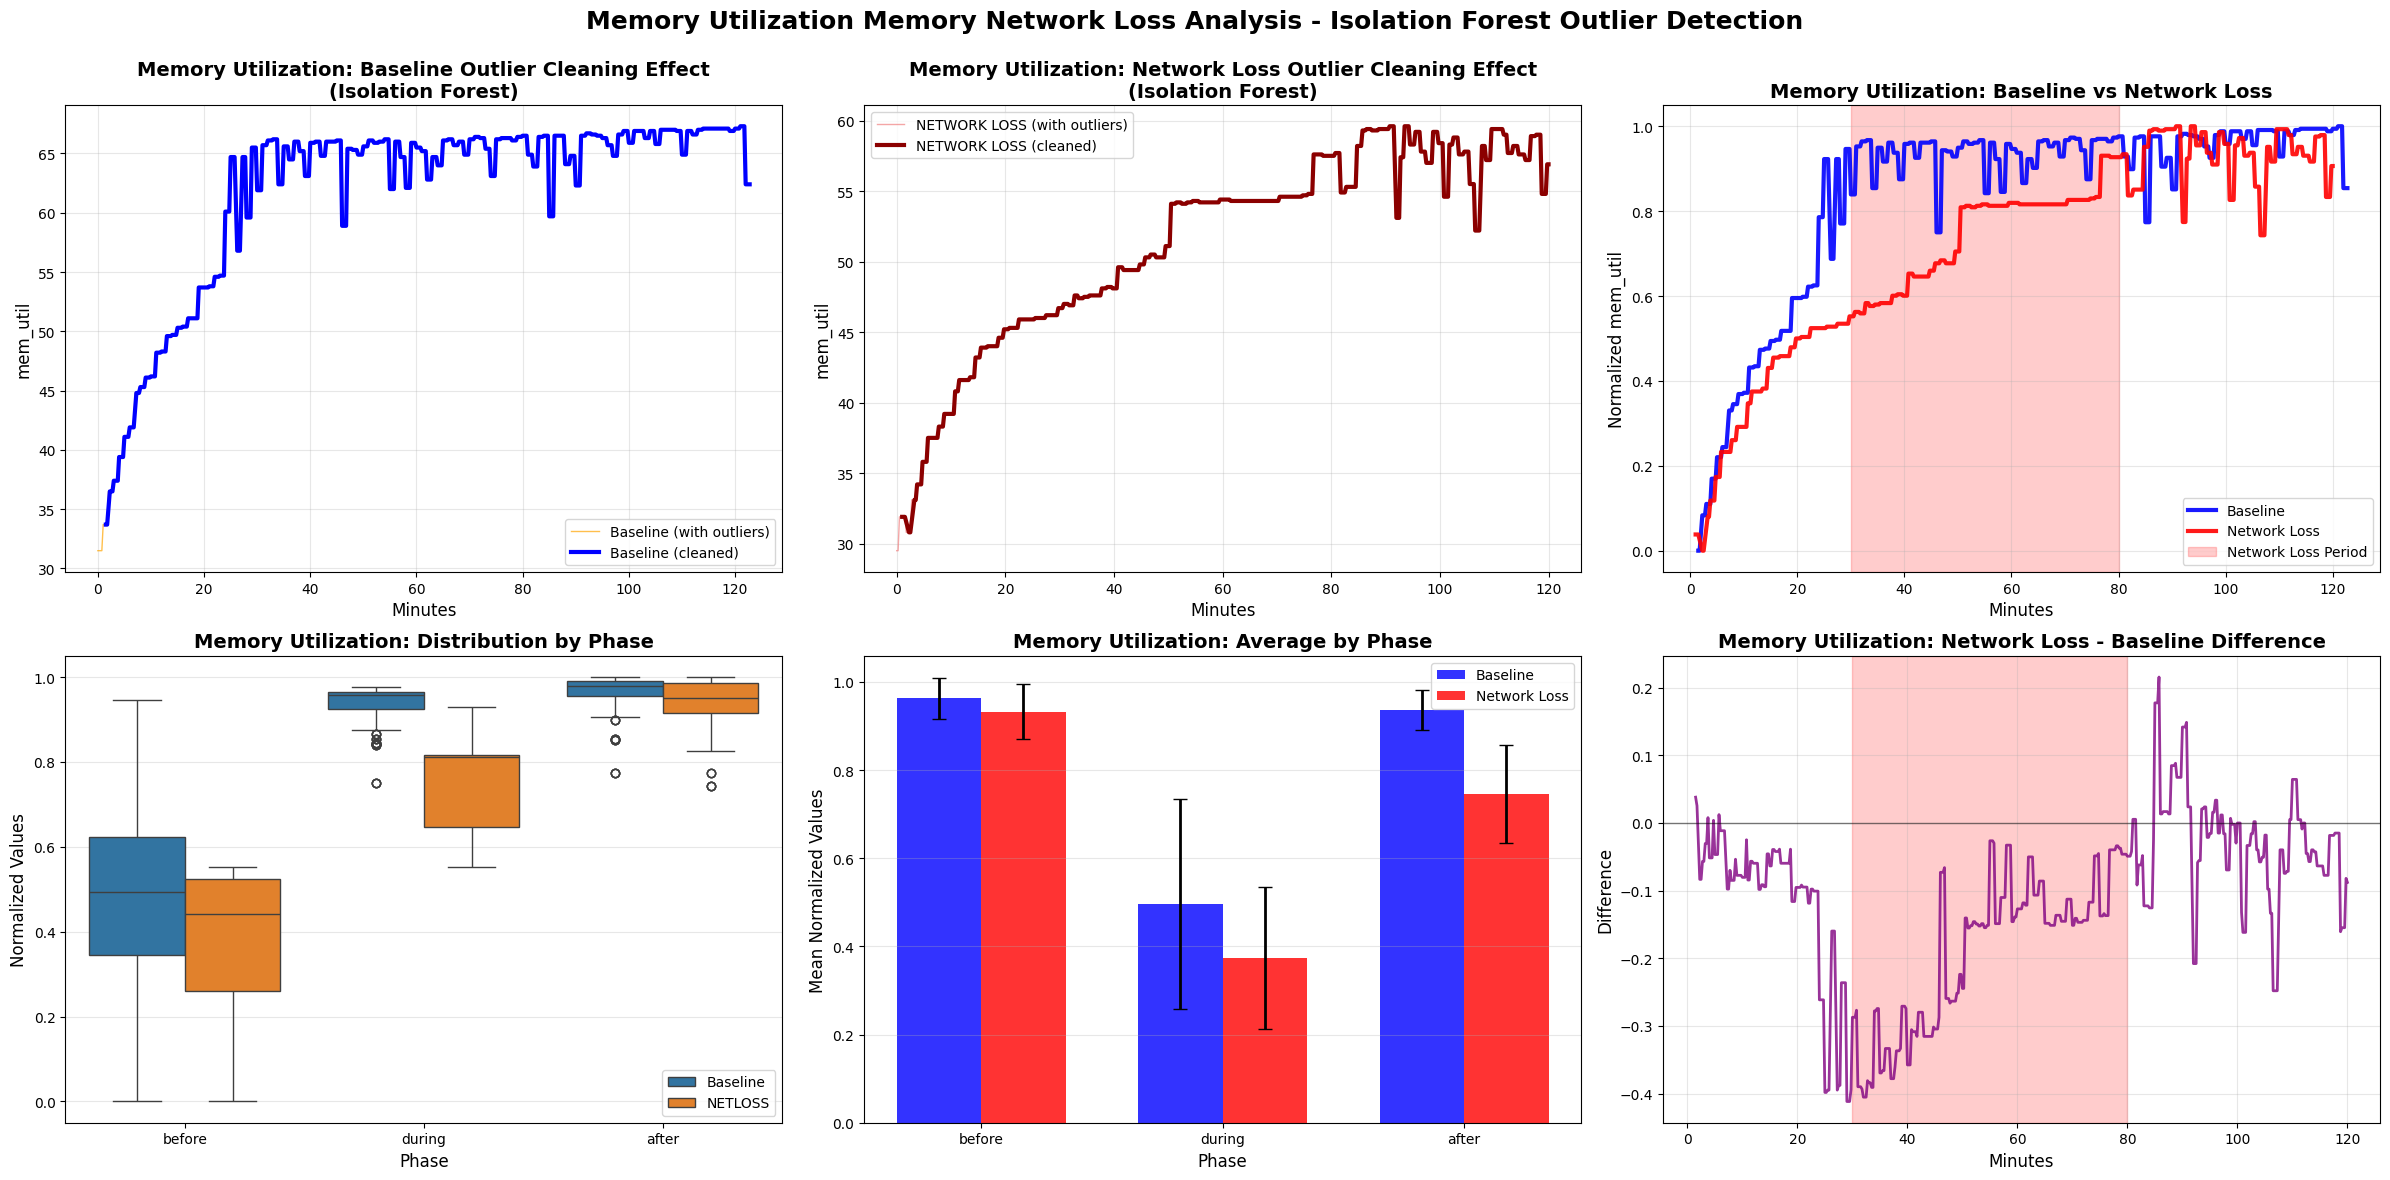


MEMORY UTILIZATION - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9625  0.0460  0.7738  1.0000
before  0.4960  0.2388  0.0000  0.9464
during  0.9355  0.0458  0.7500  0.9762

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9325  0.0631  0.7431  1.0000
before  0.3737  0.1618  0.0000  0.5521
during  0.7456  0.1107  0.5521  0.9306

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  4.56, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= 22.47, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=  4.96, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -24.66% (↘️ DECREASE)
  DURING  :  -20.30% (↘️ DECREASE)
  AFTER   :   -3.12% (↘️ DECREASE)

🔄 Analyzing Memory Cache...


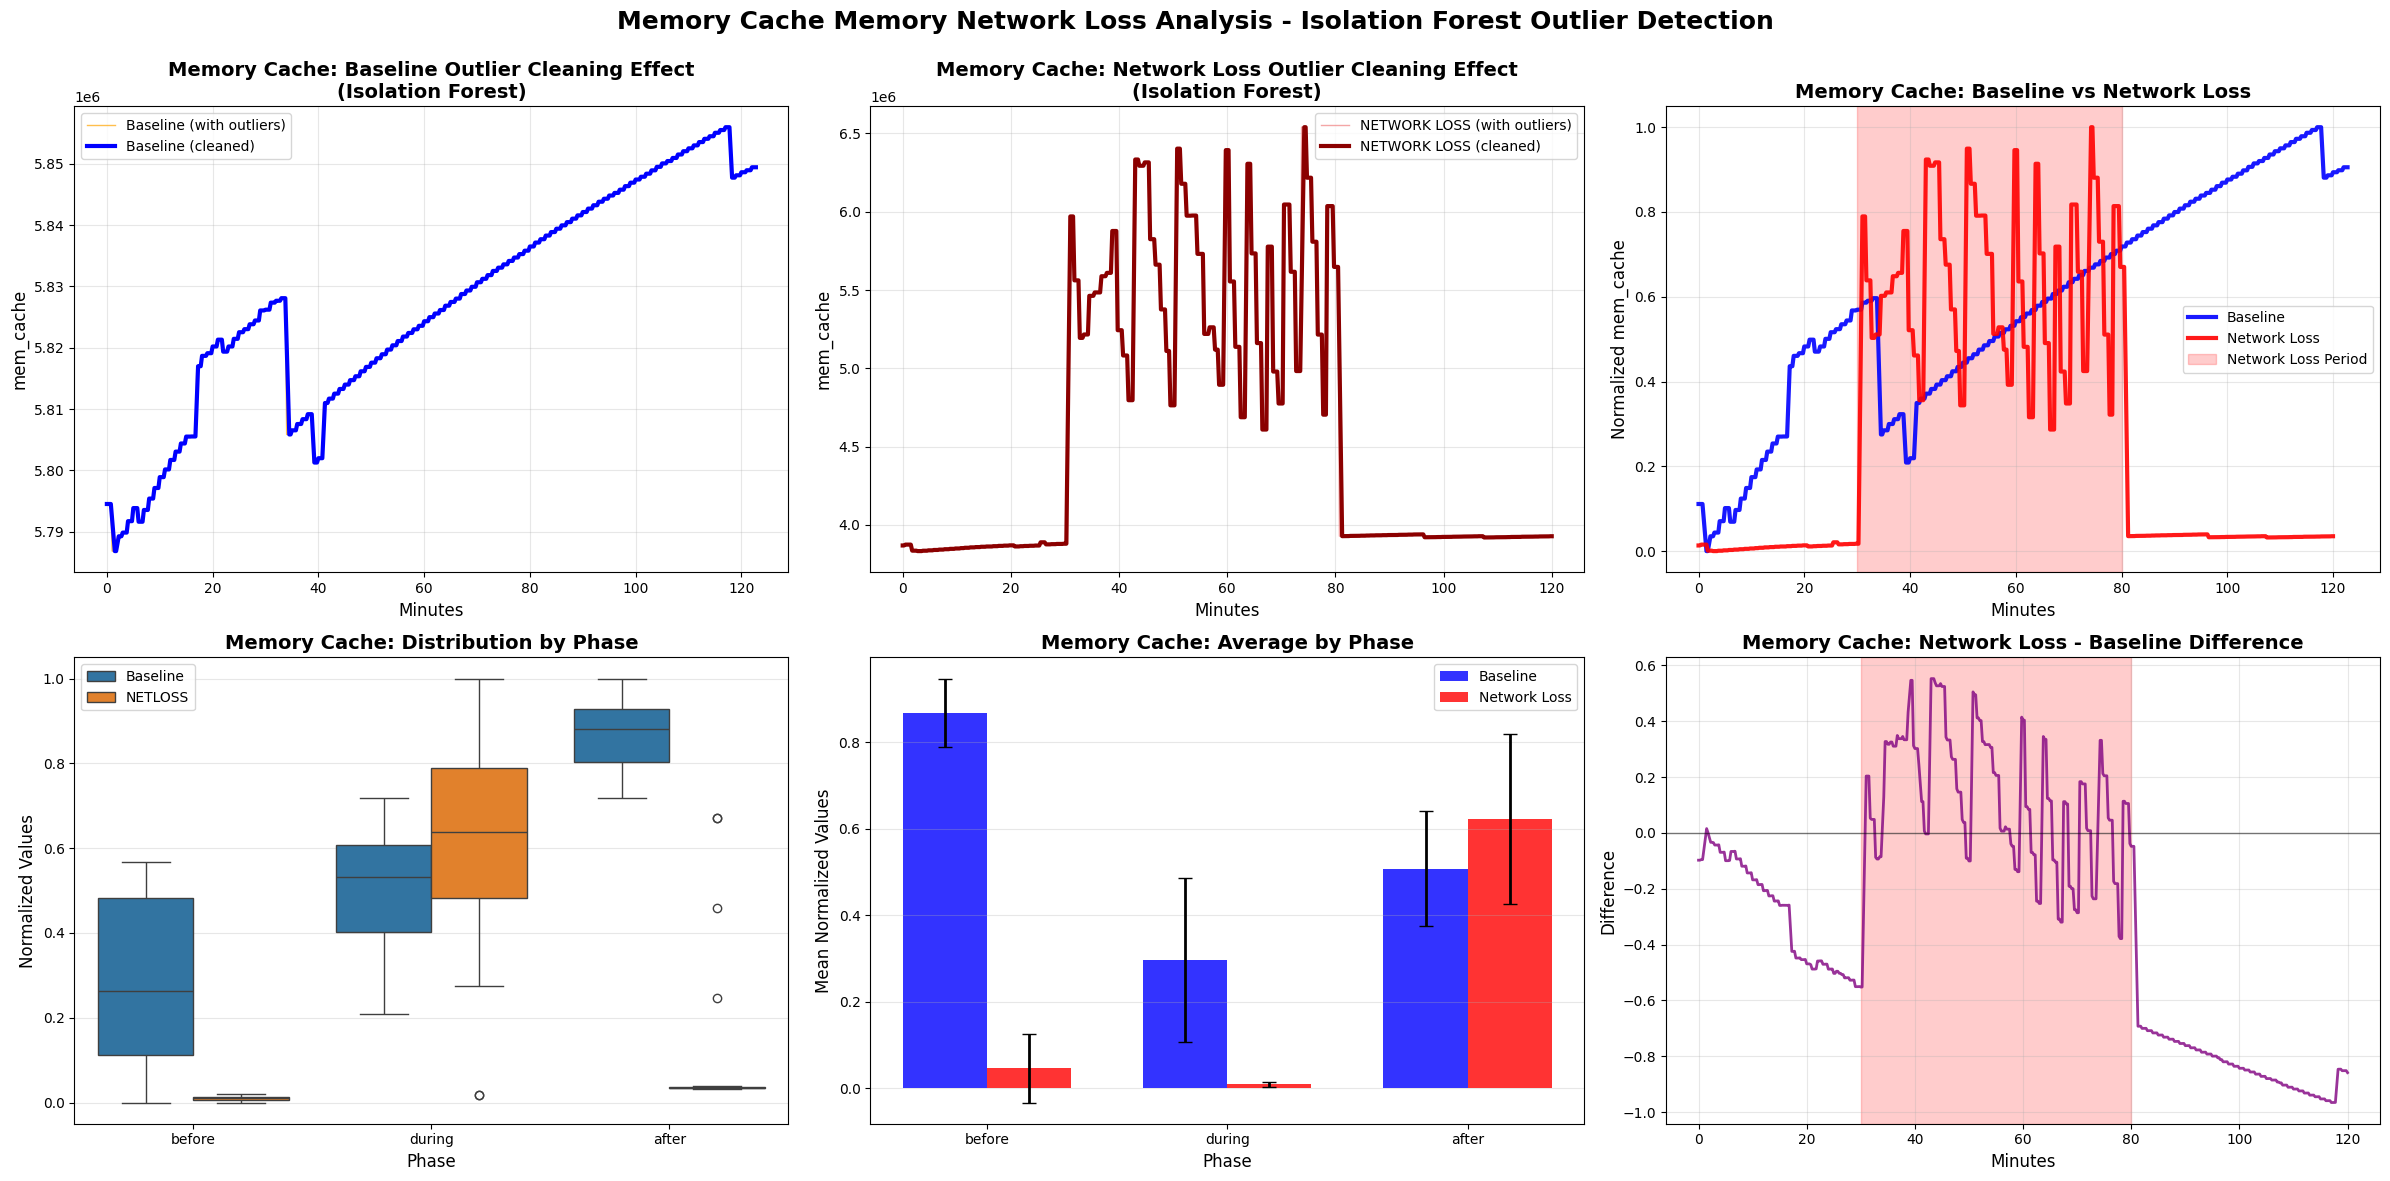


MEMORY CACHE - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8680  0.0786  0.7186  1.0000
before  0.2967  0.1887  0.0000  0.5677
during  0.5074  0.1327  0.2089  0.7186

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0470  0.0797  0.0321  0.6704
before  0.0098  0.0054  0.0000  0.0207
during  0.6216  0.1961  0.0173  1.0000

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 16.65, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t= -6.84, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= 94.36, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  -96.71% (↘️ DECREASE)
  DURING  :  +22.50% (↗️ INCREASE)
  AFTER   :  -94.58% (↘️ DECREASE)

🔄 Analyzing Memory Available...


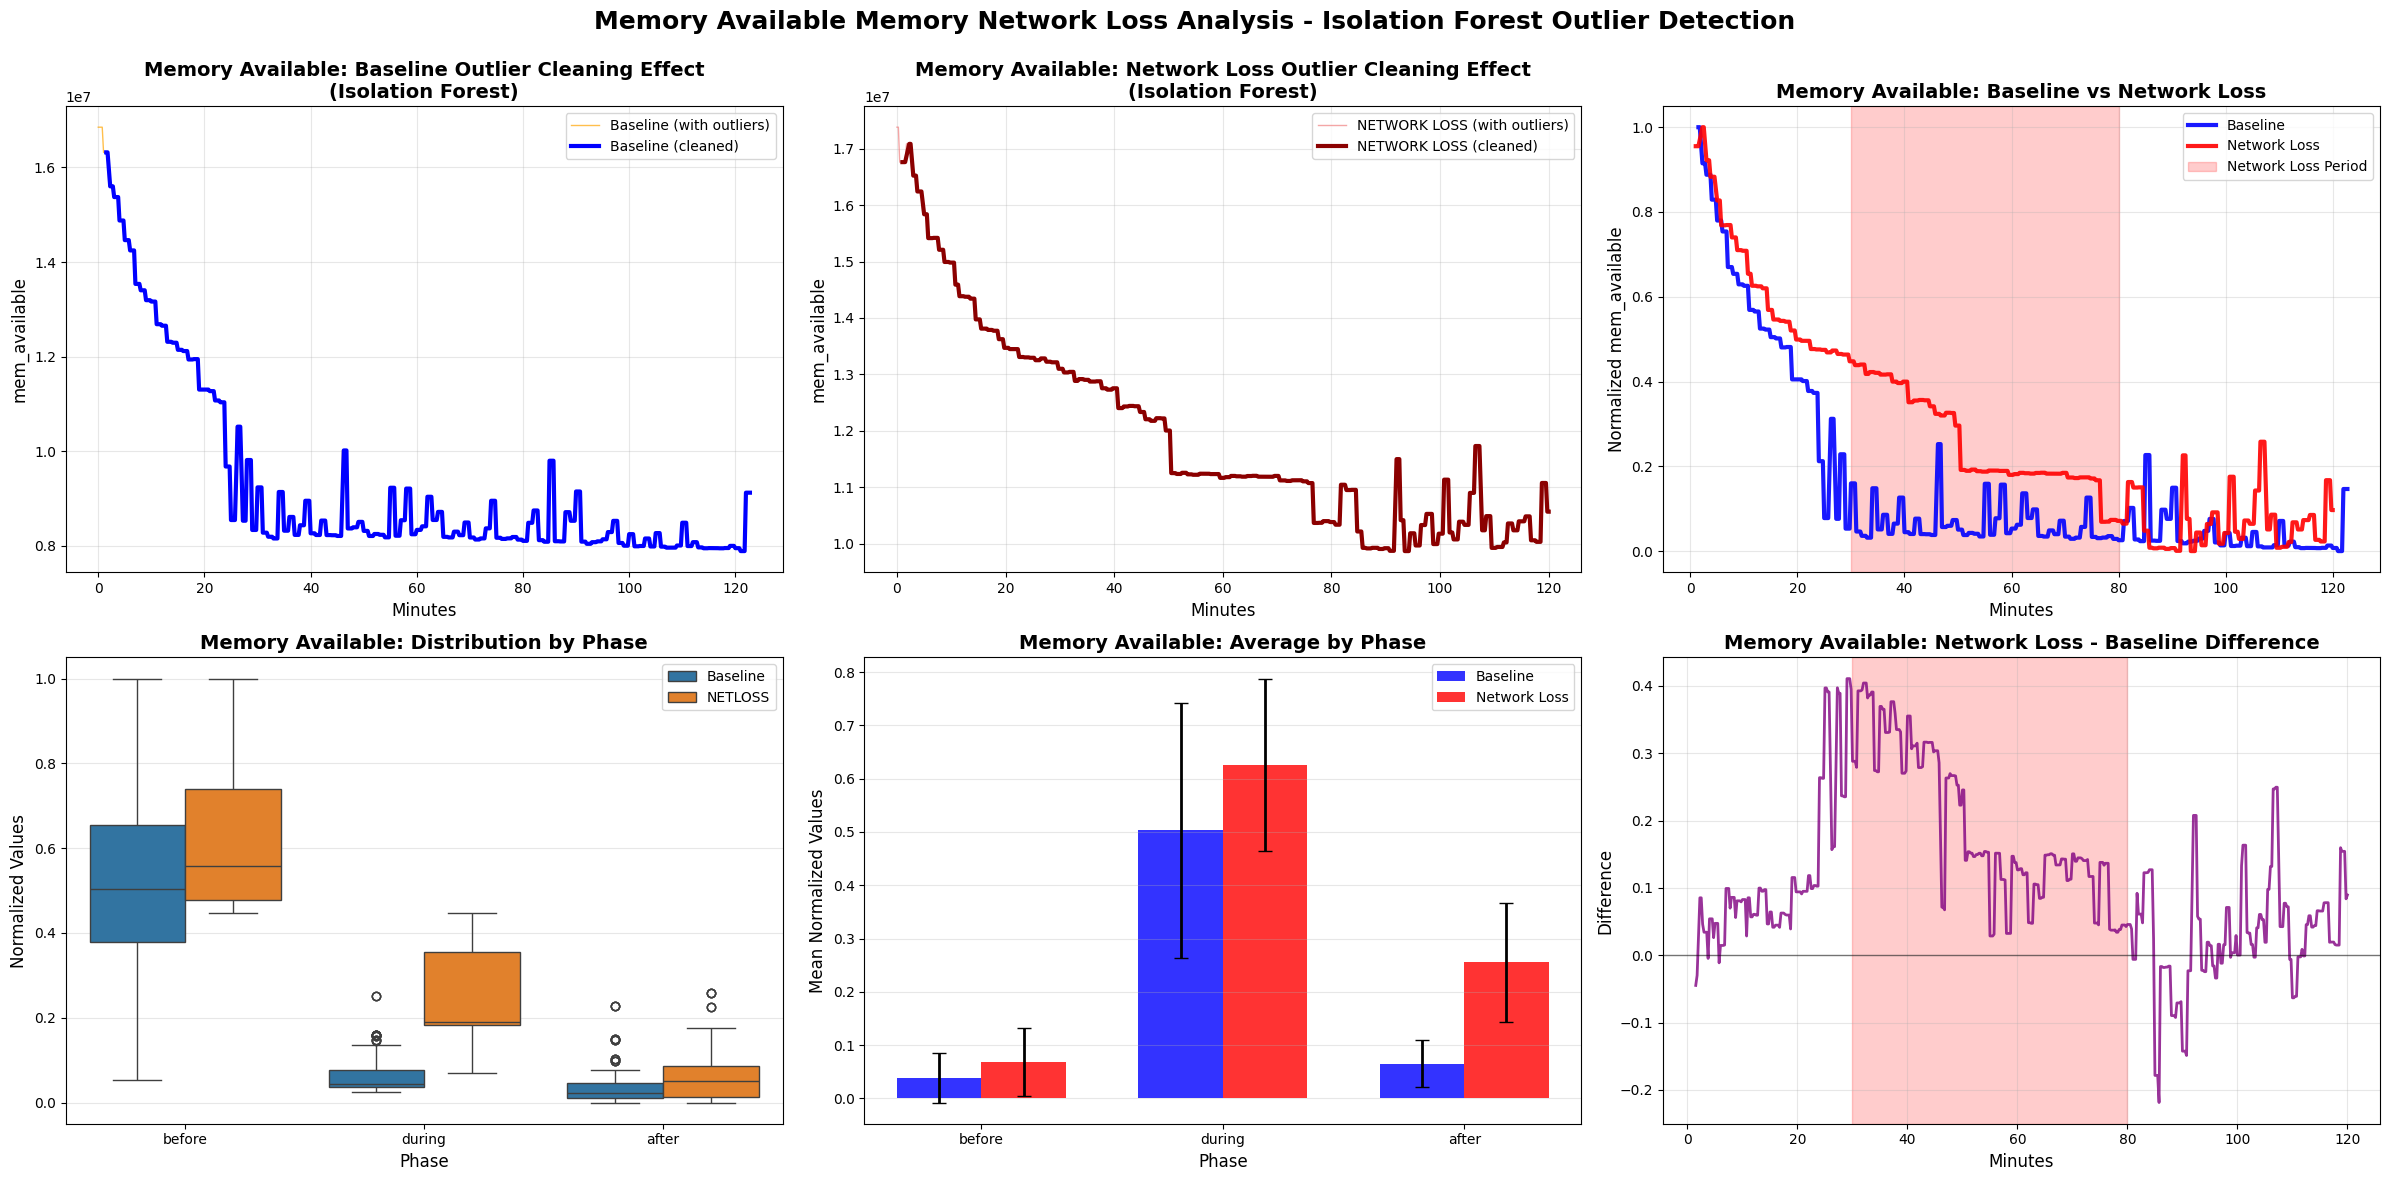


MEMORY AVAILABLE - MEMORY NETWORK LOSS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0382  0.0460  0.0000  0.2266
before  0.5027  0.2384  0.0530  1.0000
during  0.0650  0.0443  0.0257  0.2524

📊 NETWORK LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0683  0.0633  0.0000  0.2580
before  0.6262  0.1615  0.4477  1.0000
during  0.2551  0.1109  0.0691  0.4477

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -4.61, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=-22.56, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= -4.97, p=  0.0000 (✅ SIGNIFICANT)

📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):
  BEFORE  :  +24.57% (↗️ INCREASE)
  DURING  : +292.29% (↗️ INCREASE)
  AFTER   :  +78.72% (↗️ INCREASE)

COMPREHENSIVE MEMORY NETWORK LOSS IMPACT SUMMARY
     Memory_Metric        Phase   Impact (%)      P-Value  Significant  T-Statistic
Memory Utilizatio

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load all memory datasets
df_mem_util = pd.read_csv("mem_util.csv")
df_mem_cache = pd.read_csv("mem_cache.csv")
df_mem_available = pd.read_csv("mem_available.csv")

df_baseline_mem_util = pd.read_csv("../../baseline/memory related/mem_util.csv")
df_baseline_mem_cache = pd.read_csv("../../baseline/memory related/mem_cache.csv")
df_baseline_mem_available = pd.read_csv("../../baseline/memory related/mem_available.csv")

# Add source labels for NETWORK LOSS experiment
df_mem_util["source"] = "NETLOSS"
df_mem_cache["source"] = "NETLOSS"
df_mem_available["source"] = "NETLOSS"

df_baseline_mem_util["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_available["source"] = "BASELINE"

# Convert to datetime
df_mem_util["Time"] = pd.to_datetime(df_mem_util["Time"])
df_mem_cache["Time"] = pd.to_datetime(df_mem_cache["Time"])
df_mem_available["Time"] = pd.to_datetime(df_mem_available["Time"])

df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_mem_util["Time"].min() - df_mem_util["Time"].min()
df_mem_util["Time"] += time_offset
df_mem_cache["Time"] += time_offset
df_mem_available["Time"] += time_offset

# Convert timeline to minutes
all_dfs = [
    df_mem_util, df_mem_cache, df_mem_available,
    df_baseline_mem_util, df_baseline_mem_cache, df_baseline_mem_available
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# ORIGINAL DATASETS DICTIONARY
original_datasets = {
    'Memory Utilization': {'netloss': df_mem_util, 'baseline': df_baseline_mem_util},
    'Memory Cache': {'netloss': df_mem_cache, 'baseline': df_baseline_mem_cache},
    'Memory Available': {'netloss': df_mem_available, 'baseline': df_baseline_mem_available}
}

# ISOLATION FOREST OUTLIER DETECTION FOR NETWORK LOSS ANALYSIS
def remove_outliers_isolation_forest_netloss(df, contamination=0.02):
    """
    Network loss specific outlier detection using Isolation Forest
    Lower contamination (2%) as network issues typically don't affect memory metrics much
    """
    df_clean = df.copy()
    outlier_stats = {}
    
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if len(numeric_cols) == 0:
        return df_clean, outlier_stats
    
    if len(numeric_cols) == 1:
        main_col = numeric_cols[0]
        series = df[main_col].fillna(method='ffill').fillna(method='bfill')
        
        features = []
        features.append(series.values)
        
        if len(series) > 15:
            # Network loss may cause buffering effects - capture these patterns
            features.append(series.rolling(3, center=True).mean().fillna(method='ffill').fillna(method='bfill').values)
            features.append(series.rolling(7, center=True).mean().fillna(method='ffill').fillna(method='bfill').values)
            features.append(series.rolling(5, center=True).std().fillna(0).values)
            features.append(series.diff().fillna(0).values)
            features.append(series.diff().diff().fillna(0).values)
            
            # Network-specific: look for sudden drops or spikes
            features.append(series.rolling(3, center=True).min().fillna(method='ffill').fillna(method='bfill').values)
            features.append(series.rolling(3, center=True).max().fillna(method='ffill').fillna(method='bfill').values)
        
        feature_matrix = np.column_stack(features)
    else:
        feature_matrix = df[numeric_cols].fillna(method='ffill').fillna(method='bfill').values
    
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    
    iso_forest = IsolationForest(
        contamination=contamination,
        n_estimators=150,
        random_state=42,
        n_jobs=-1,
        max_features=1.0
    )
    
    iso_forest.fit(feature_matrix_scaled)
    outlier_predictions = iso_forest.predict(feature_matrix_scaled)
    outlier_mask = outlier_predictions == -1
    
    for col in numeric_cols:
        outlier_stats[col] = {
            'count': outlier_mask.sum(),
            'percentage': (outlier_mask.sum() / len(df[col])) * 100,
            'method': 'isolation_forest_netloss'
        }
        
        df_clean.loc[outlier_mask, col] = np.nan
        df_clean[col] = df_clean[col].interpolate(method='linear')
    
    outlier_stats['_summary'] = {
        'total_outliers': outlier_mask.sum(),
        'contamination_rate': contamination,
        'method': 'isolation_forest_netloss',
        'features_used': feature_matrix.shape[1],
        'n_estimators': 150
    }
    
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
print("=" * 80)
print("OUTLIER DETECTION AND CLEANING - MEMORY NETWORK LOSS ANALYSIS (ISOLATION FOREST)")
print("=" * 80)

datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    print(f"\n📊 Processing {dataset_name} with Isolation Forest:")
    
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        
        df_clean, stats = remove_outliers_isolation_forest_netloss(df, contamination=0.02)
        
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        total_outliers = stats['_summary']['total_outliers']
        features_used = stats['_summary']['features_used']
        print(f"    ✅ Cleaned {total_outliers} outliers using {features_used} features (2% contamination)")

# NORMALIZATION FUNCTION
def normalize_df_memory(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# ANALYSIS AND PLOT FUNCTION FOR MEMORY NETWORK LOSS
def analyze_and_plot_memory_dataset_wide(dataset_name, netloss_df, baseline_df, delay_minutes, duration_minutes):
    numeric_cols = [col for col in netloss_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    netloss_norm = normalize_df_memory(netloss_df, numeric_cols)
    baseline_norm = normalize_df_memory(baseline_df, numeric_cols)
    
    main_metric = numeric_cols[0] if numeric_cols else None
    
    if main_metric is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    netloss_norm = add_phase_column(netloss_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    stats_baseline = baseline_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    stats_netloss = netloss_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_metric],
        'NETLOSS': netloss_norm[main_metric],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': netloss_norm[main_metric] - baseline_norm[main_metric]
    })
    
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['NETLOSS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        netloss_mean = stats_netloss.loc[phase, 'mean']
        impact[phase] = ((netloss_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # PLOTTING
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    original_baseline = original_datasets[dataset_name]['baseline']
    
    plt.plot(original_baseline['Minutes'], original_baseline[main_metric], 
             label='Baseline (with outliers)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df[main_metric], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect\n(Isolation Forest)', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. NETWORK LOSS outlier cleaning effect
    plt.subplot(2, 3, 2)
    original_netloss = original_datasets[dataset_name]['netloss']
    
    plt.plot(original_netloss['Minutes'], original_netloss[main_metric], 
             label='NETWORK LOSS (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(netloss_df['Minutes'], netloss_df[main_metric], 
             label='NETWORK LOSS (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: Network Loss Outlier Cleaning Effect\n(Isolation Forest)', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_metric], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(netloss_norm['Minutes'], netloss_norm[main_metric], 
             label='Network Loss', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Network Loss Period")
    plt.title(f"{dataset_name}: Baseline vs Network Loss", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_metric}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'NETLOSS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_netloss['mean'], width, label='Network Loss', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_netloss['mean'], yerr=stats_netloss['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: Network Loss - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} Memory Network Loss Analysis - Isolation Forest Outlier Detection', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()
    
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - MEMORY NETWORK LOSS ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 NETWORK LOSS STATISTICS BY PHASE:")
    print(stats_netloss.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 NETWORK LOSS IMPACT ON MEMORY (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_netloss': stats_netloss,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_metric
    }

# RUN ANALYSIS 
print(f"\n{'='*80}")
print("COMPREHENSIVE MEMORY NETWORK LOSS ANALYSIS - ISOLATION FOREST")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    netloss_clean = datasets_clean[dataset_name]['netloss']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_memory_dataset_wide(
        dataset_name, 
        netloss_clean, 
        baseline_clean, 
        delay, 
        duration
    )

# FINAL SUMMARY
print(f"\n{'='*100}")
print("COMPREHENSIVE MEMORY NETWORK LOSS IMPACT SUMMARY")
print(f"{'='*100}")

summary_table = []
for dataset_name, results in analysis_results.items():
    if results:
        for phase in ['before', 'during', 'after']:
            summary_table.append({
                'Memory_Metric': dataset_name,
                'Phase': phase,
                'Impact (%)': f"{results['impact'][phase]:+.1f}%",
                'P-Value': f"{results['t_tests'][phase]['p']:.4f}",
                'Significant': 'YES' if results['t_tests'][phase]['p'] < 0.05 else 'NO',
                'T-Statistic': f"{results['t_tests'][phase]['t']:.2f}"
            })

if summary_table:
    summary_df = pd.DataFrame(summary_table)
    print(summary_df.to_string(index=False, col_space=12))
